In [6]:
!pip install libpysal
!pip install geopandas
from libpysal import weights
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import gdown
import zipfile
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
url =  "https://drive.google.com/uc?export=download&id=1cHVcrjJxDMoLdI_h6YuCdeoz_PE71XqN"
output = "BR_Municipios_2020" 
gdown.download(url, output+".zip")
cwd = os.getcwd()+"/"
with zipfile.ZipFile(cwd+output+".zip", 'r') as zip_ref:
  zip_ref.extractall(cwd)

Downloading...
From: https://drive.google.com/uc?export=download&id=1cHVcrjJxDMoLdI_h6YuCdeoz_PE71XqN
To: /content/BR_Municipios_2020.zip
100%|██████████| 190M/190M [00:00<00:00, 196MB/s]


In [8]:
!ls "BR_Municipios_2020"

BR_Municipios_2020.cpg	BR_Municipios_2020.prj	BR_Municipios_2020.shx
BR_Municipios_2020.dbf	BR_Municipios_2020.shp


In [9]:
municipios = gpd.read_file('BR_Municipios_2020/BR_Municipios_2020.shp')

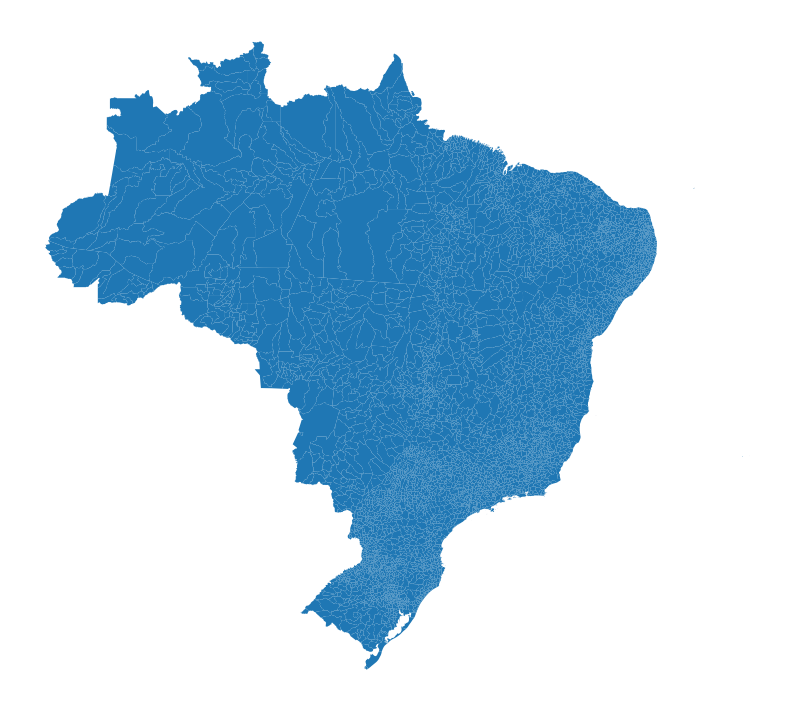

In [10]:
f, ax = plt.subplots(figsize=(10, 10))
municipios.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [11]:
import pandas as pd
one_hot = pd.get_dummies(municipios['SIGLA_UF'],prefix='UF_')
#municipios = municipios.merge(one_hot,left_index=True,right_index=True)
#municipios

In [12]:
one_hot.iloc[0]['UF__TO']

0

In [13]:
m = municipios.geometry.to_crs(epsg=5641)

In [32]:
municipios.iloc[:3,:]

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."


In [59]:
coord = municipios.geometry.get_coordinates()
coord.index.name = "index"
coord

,x,y
index,,
0,-62.194647,-11.827457
0,-62.193317,-11.828443
0,-62.189455,-11.827946
0,-62.183930,-11.835661
0,-62.178065,-11.841831
...,...,...
5569,-47.418287,-15.545739
5569,-47.418087,-15.545876
5569,-47.417787,-15.546259


In [66]:
g_coord = coord.groupby("index")
for group,data in g_coord:
  print(data.shape)

Streaming output truncated to the last 5000 lines.
(4869, 2)
(14205, 2)
(1643, 2)
(1751, 2)
(86, 2)
(236, 2)
(772, 2)
(433, 2)
(710, 2)
(1876, 2)
(373, 2)
(143, 2)
(934, 2)
(698, 2)
(431, 2)
(599, 2)
(721, 2)
(1575, 2)
(998, 2)
(705, 2)
(587, 2)
(150, 2)
(1583, 2)
(718, 2)
(307, 2)
(432, 2)
(383, 2)
(6366, 2)
(825, 2)
(598, 2)
(1545, 2)
(48, 2)
(1270, 2)
(1547, 2)
(2165, 2)
(1024, 2)
(9989, 2)
(7535, 2)
(716, 2)
(2398, 2)
(469, 2)
(3528, 2)
(503, 2)
(1754, 2)
(161, 2)
(1189, 2)
(396, 2)
(167, 2)
(4680, 2)
(344, 2)
(170, 2)
(841, 2)
(147, 2)
(2670, 2)
(639, 2)
(632, 2)
(408, 2)
(1075, 2)
(654, 2)
(6743, 2)
(9636, 2)
(321, 2)
(969, 2)
(3676, 2)
(5527, 2)
(3433, 2)
(612, 2)
(3636, 2)
(1584, 2)
(1182, 2)
(6087, 2)
(1044, 2)
(1057, 2)
(1282, 2)
(475, 2)
(98, 2)
(1841, 2)
(1153, 2)
(1235, 2)
(77, 2)
(2590, 2)
(1247, 2)
(487, 2)
(640, 2)
(607, 2)
(883, 2)
(2636, 2)
(1147, 2)
(2322, 2)
(808, 2)
(1723, 2)
(1070, 2)
(1623, 2)
(5491, 2)
(791, 2)
(775, 2)
(1325, 2)
(1142, 2)
(240, 2)
(110, 2)
(117

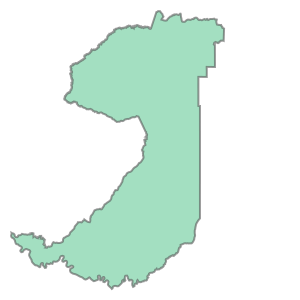

In [34]:
m[0]

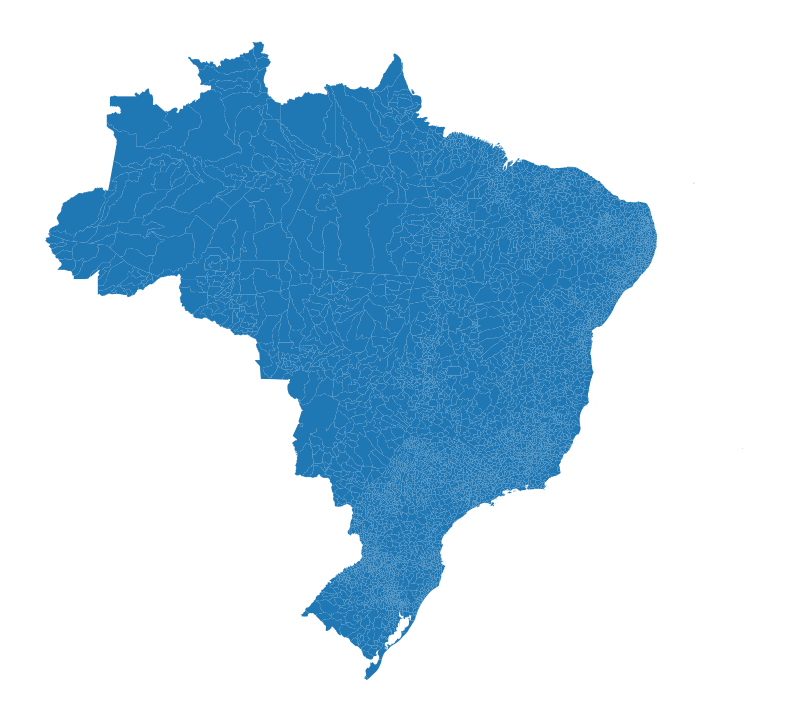

In [14]:
f, ax = plt.subplots(figsize=(10, 10))
m.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [15]:
centroids = np.column_stack((m.centroid.x, m.centroid.y))

In [16]:
m

0       POLYGON ((2864554.644 8683471.305, 2864702.519...
1       POLYGON ((2826525.135 8919239.806, 2827507.145...
2       POLYGON ((3067417.578 8509133.955, 3067401.018...
3       POLYGON ((2997373.064 8743279.392, 2997346.819...
4       POLYGON ((2941862.092 8550155.479, 2942047.779...
                              ...                        
5565    POLYGON ((4401336.889 8135390.513, 4401398.682...
5566    POLYGON ((4238527.636 8025343.647, 4238638.520...
5567    POLYGON ((4542291.331 8360138.425, 4542432.291...
5568    POLYGON ((4359648.103 8338581.733, 4359722.797...
5569    POLYGON ((4508561.280 8260229.556, 4508577.194...
Name: geometry, Length: 5570, dtype: geometry

In [17]:
queen = weights.Queen.from_dataframe(municipios)

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 1525, 3499.
  warnings.warn(message)


In [22]:
G = queen.to_networkx()
G.edges(nbunch=0, data=True)

EdgeDataView([(0, 13, {'weight': 1.0}), (0, 19, {'weight': 1.0}), (0, 20, {'weight': 1.0}), (0, 22, {'weight': 1.0}), (0, 25, {'weight': 1.0}), (0, 28, {'weight': 1.0}), (0, 45, {'weight': 1.0})])

In [23]:
for src,dest,edge_data in G.edges.data():
    edge_data['weight'] = np.linalg.norm(centroids[src] - centroids[dest])
G.edges(nbunch=0, data=True)

EdgeDataView([(0, 13, {'weight': 93557.38700219369}), (0, 19, {'weight': 100506.30444195436}), (0, 20, {'weight': 81204.52405006425}), (0, 22, {'weight': 124730.97814119693}), (0, 25, {'weight': 45989.01089140472}), (0, 28, {'weight': 91788.19337150028}), (0, 45, {'weight': 94942.42120619127})])

In [24]:
positions = dict(zip(G.nodes, centroids))
for node in G.nodes():
    G.nodes[node]['MUN'] = municipios.iloc[node].NM_MUN
    G.nodes[node]['CD_MUN'] = municipios.iloc[node].CD_MUN
    G.nodes[node]['UF'] = municipios.iloc[node].SIGLA_UF
    G.nodes[node]['AREA'] = municipios.iloc[node].AREA_KM2
    for col in one_hot.columns:
      G.nodes[node][col] = int(one_hot.iloc[node][col])

In [25]:
one_hot.iloc[1]['UF__BA']

0

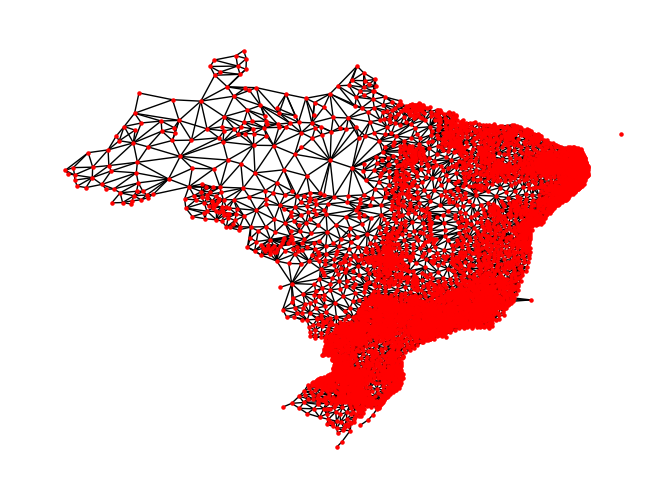

In [26]:
nx.draw(G, positions, node_size=5, node_color="r")

In [28]:
G.nodes[0]

{'MUN': "Alta Floresta D'Oeste",
 'CD_MUN': '1100015',
 'UF': 'RO',
 'AREA': 7067.127,
 'UF__AC': 0,
 'UF__AL': 0,
 'UF__AM': 0,
 'UF__AP': 0,
 'UF__BA': 0,
 'UF__CE': 0,
 'UF__DF': 0,
 'UF__ES': 0,
 'UF__GO': 0,
 'UF__MA': 0,
 'UF__MG': 0,
 'UF__MS': 0,
 'UF__MT': 0,
 'UF__PA': 0,
 'UF__PB': 0,
 'UF__PE': 0,
 'UF__PI': 0,
 'UF__PR': 0,
 'UF__RJ': 0,
 'UF__RN': 0,
 'UF__RO': 1,
 'UF__RR': 0,
 'UF__RS': 0,
 'UF__SC': 0,
 'UF__SE': 0,
 'UF__SP': 0,
 'UF__TO': 0}

In [29]:
one_hot.isna().sum()

UF__AC    0
UF__AL    0
UF__AM    0
UF__AP    0
UF__BA    0
UF__CE    0
UF__DF    0
UF__ES    0
UF__GO    0
UF__MA    0
UF__MG    0
UF__MS    0
UF__MT    0
UF__PA    0
UF__PB    0
UF__PE    0
UF__PI    0
UF__PR    0
UF__RJ    0
UF__RN    0
UF__RO    0
UF__RR    0
UF__RS    0
UF__SC    0
UF__SE    0
UF__SP    0
UF__TO    0
dtype: int64

In [ ]:
nx.write_gml(G, "municipios_br.gml")